In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200, 'display.max_columns', 50)



In [2]:
results = pd.read_csv('IntrinsicProfiles_Results.csv')
results['MouseDevelopment'] = results['MouseDevelopment'].astype('category')
results['MouseDevelopment'] = results['MouseDevelopment'].cat.reorder_categories(['P5-P8', 'P9-P13', 'P14-P18'])
results['Tau'] = results['Tau']*1000
results['AP_HalfWidth'] = results['AP_HalfWidth']*1000

In [3]:
def getMaturityIndex(df):
    uRin = np.nanmean(df[df["MouseDevelopment"]=='P14-P18'].Rin)
    uRMP = np.nanmean(df[df["MouseDevelopment"]=='P14-P18'].RMP)
    uTau = np.nanmean(df[df["MouseDevelopment"]=='P14-P18'].Tau)
    uRheobase = np.nanmean(df[df["MouseDevelopment"]=='P14-P18'].Rheobase)
    uMaxFiringFrequency = np.nanmean(df[df["MouseDevelopment"]=='P14-P18'].MaxFiringFrequency)
    uAP_Threshold = np.nanmean(df[df["MouseDevelopment"]=='P14-P18'].AP_Threshold)
    uAP_HalfWidth = np.nanmean(df[df["MouseDevelopment"]=='P14-P18'].AP_HalfWidth)
    uAP_Height = np.nanmean(df[df["MouseDevelopment"]=='P14-P18'].AP_Height)

    df["MaturityIndex"] = ((uRin/df.Rin)+(df.RMP/uRMP)+(df.Rheobase/uRheobase)+(df.MaxFiringFrequency/uMaxFiringFrequency)+(df.AP_Threshold/uAP_Threshold)+(uAP_HalfWidth/df.AP_HalfWidth)+(df.AP_Height/uAP_Height))/7
    return df
# +(uTau/df.Tau)

In [4]:
def setPlotLayout(ax):
    ax.set_xlabel(None)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.xaxis.set_tick_params(width=3, length=10)
    ax.yaxis.set_tick_params(width=3, length=10)
    return ax

In [5]:
def plotIPfeatures_Window(df, hue = None):
    columns = ["Rin", "RMP", "Tau", "Rheobase", "MaxFiringFrequency", "AdaptationIndex", "VoltageSag", "AP_Threshold", "AP_HalfWidth", "AP_Height", "AP_AHP", "MaturityIndex"]
    ylabels = ['Rin (M\u03A9)', 'RMP (mV)', 'Tau (ms)', 'Rheobase (pA)', 'Max Firing Frequency (Hz)', 'Adaptation Index', 'Voltage Sag (mV)', 'AP Threshold (mV)', 'AP Half Width (ms)', 'AP Height (mV)', 'AP AHP (mV)','MaturityIndex']
    ylowerlim = [0, None, 0, 0, 0, None, 0, None, None, None, None, 0.3]
    yupperlim = [None,None,None,None,None,None,None,None,None,None,None,2.0]

    fig, axes = plt.subplots(4,3, figsize=[20, 20])
    axes = axes.flatten()
    for i, y in enumerate(columns):
        ax = axes[i]
        sns.violinplot(x="MouseDevelopment", y=y, kind="violin", hue=hue, inner="quartile", data=df, color="lightgray", ax=ax)
        if hue is None:
            sns.swarmplot(x="MouseDevelopment", y=y, data=df, hue=hue, color="black", ax=ax)
        ax = setPlotLayout(ax)
        ax.set_ylim(bottom=ylowerlim[i],top=yupperlim[i])
        ax.set_ylabel(ylabels[i], fontsize=20)
        if i not in (8, 9, 10):
            ax.xaxis.set_ticklabels([])


In [6]:
def plotIPfeatures_Age(df, hue = None):
    columns = ["Rin", "RMP", "Tau", "Rheobase", "MaxFiringFrequency", "AdaptationIndex", "VoltageSag", "AP_Threshold", "AP_HalfWidth", "AP_Height", "AP_AHP", "MaturityIndex"]
    ylabels = ['Rin (M\u03A9)', 'RMP (mV)', 'Tau (ms)', 'Rheobase (pA)', 'Max Firing Frequency (Hz)', 'Adaptation Index', 'Voltage Sag (mV)', 'AP Threshold (mV)', 'AP Half Width (ms)', 'AP Height (mV)', 'AP AHP (mV)','MaturityIndex']
    ylowerlim = [0, None, 0, 0, 0, None, 0, None, None, None, None, 0.3]

    fig, axes = plt.subplots(4,3, figsize=[20, 20])
    axes = axes.flatten()
    for i, y in enumerate(columns):
        ax = axes[i]
        sns.scatterplot(x="MouseAge", y=y, data=df, color="black", ax=ax)
        ax = setPlotLayout(ax)
        ax.set_ylim(bottom=ylowerlim[i])
        ax.set_ylabel(ylabels[i], fontsize=20)
        ax.set_xticks(np.arange(5, 19, step=1))
        if (i==8):
            ax.set_ylim(bottom=0, top=4)
        
        if i not in (8, 9, 10):
            ax.xaxis.set_ticklabels([])


C:\Users\Butt Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


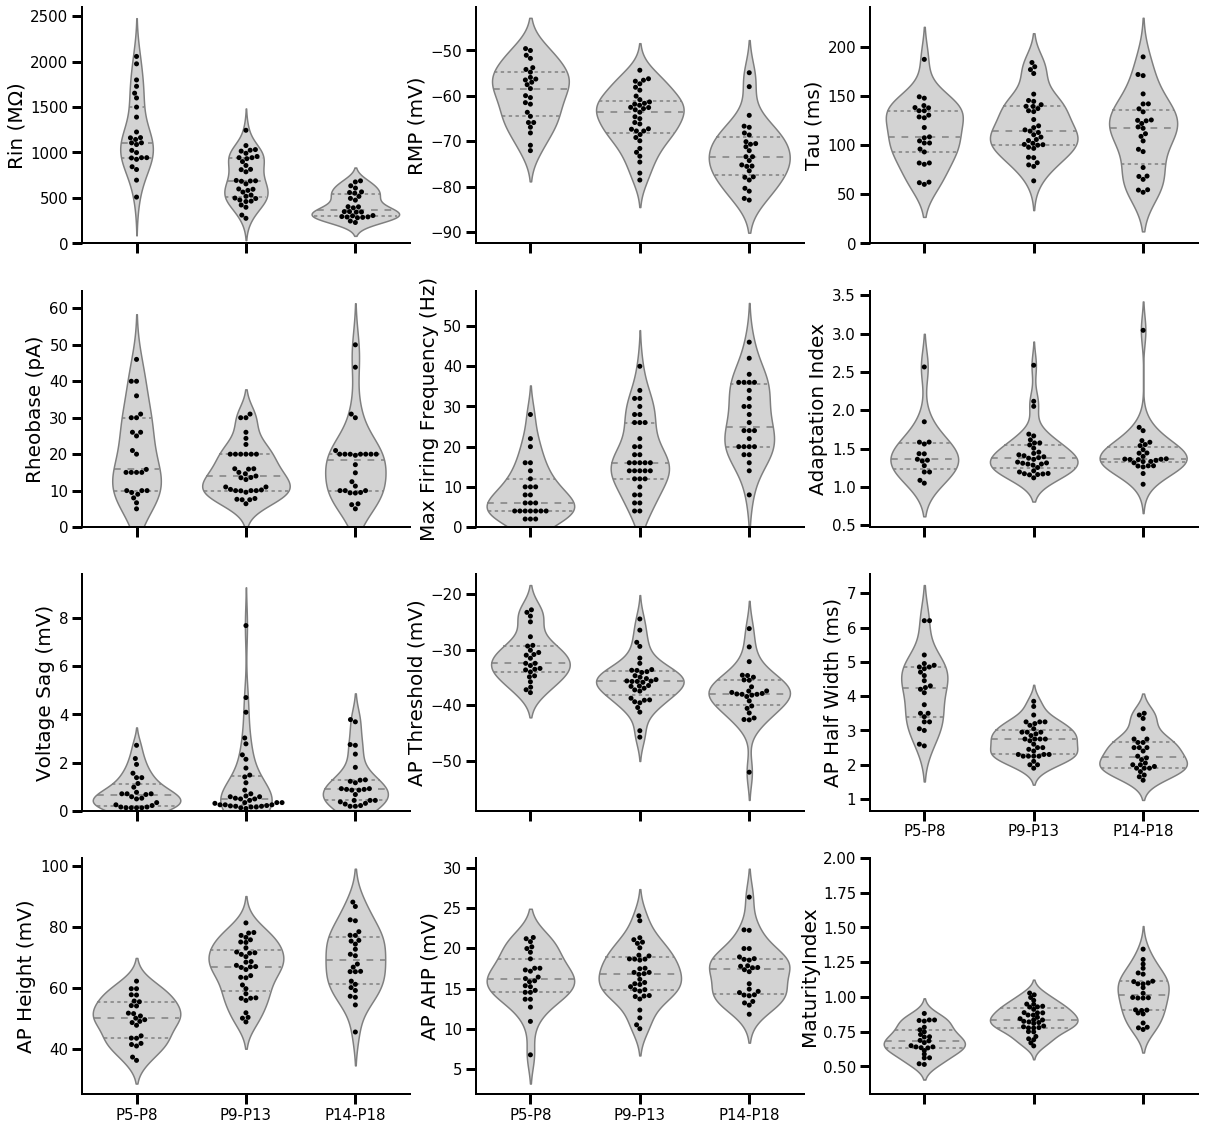

In [7]:
## L4 Pyramidal cells in V1
df = results[(results.BrainArea=="V1") & (results.CellType=="Pyr") & (results.CellLayer==4)]
df = getMaturityIndex(df)
plotIPfeatures_Window(df)

tmp=df
plt.savefig('Figures//IP_V1_Pyr_L4.pdf')  

C:\Users\Butt Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\Butt Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

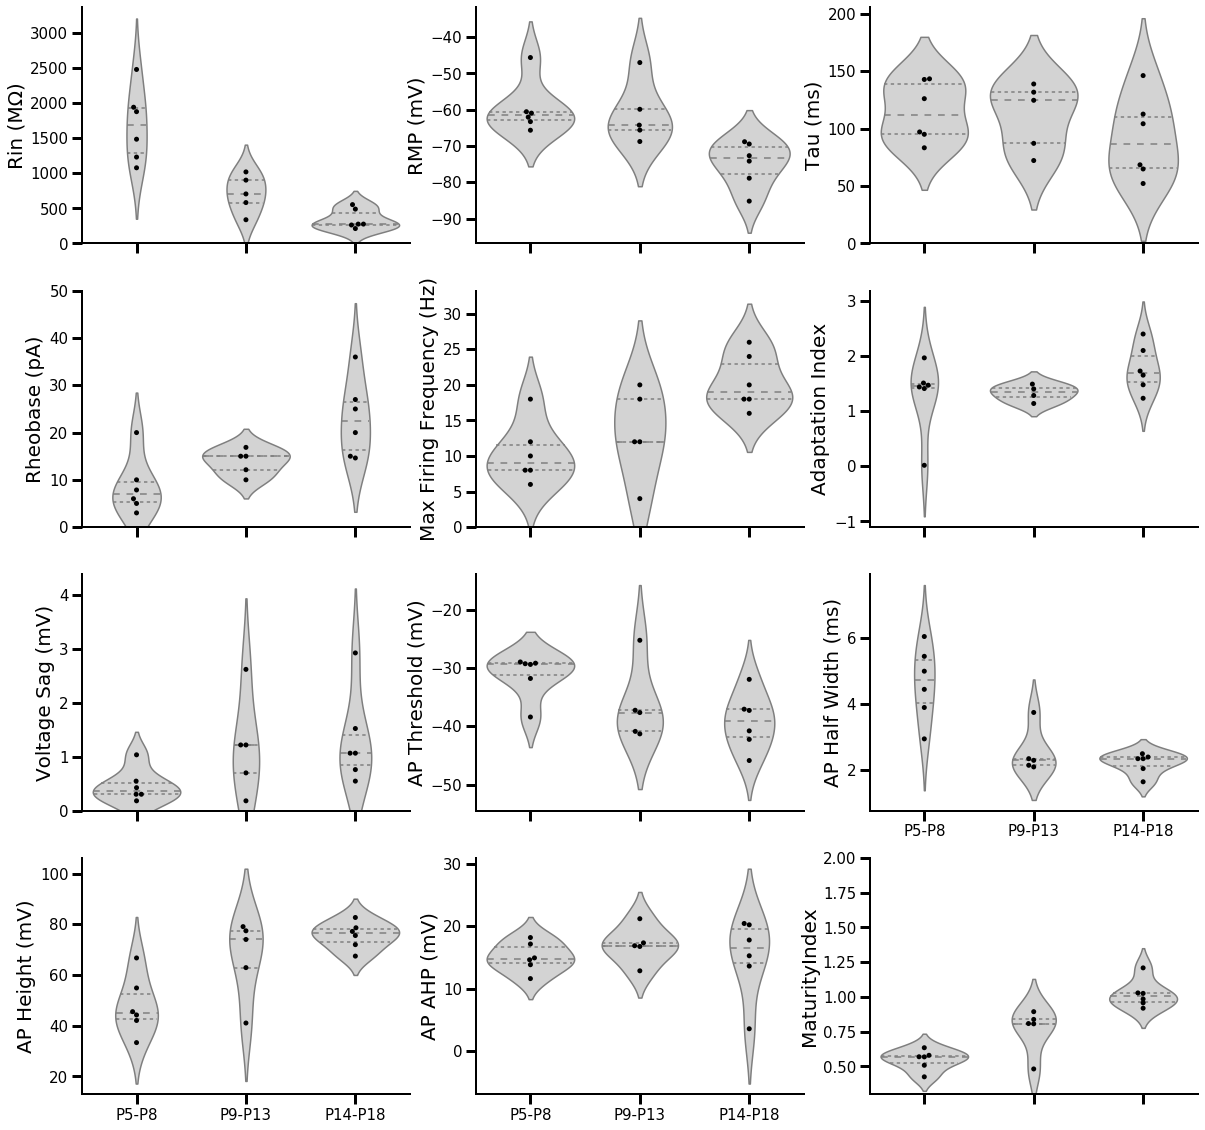

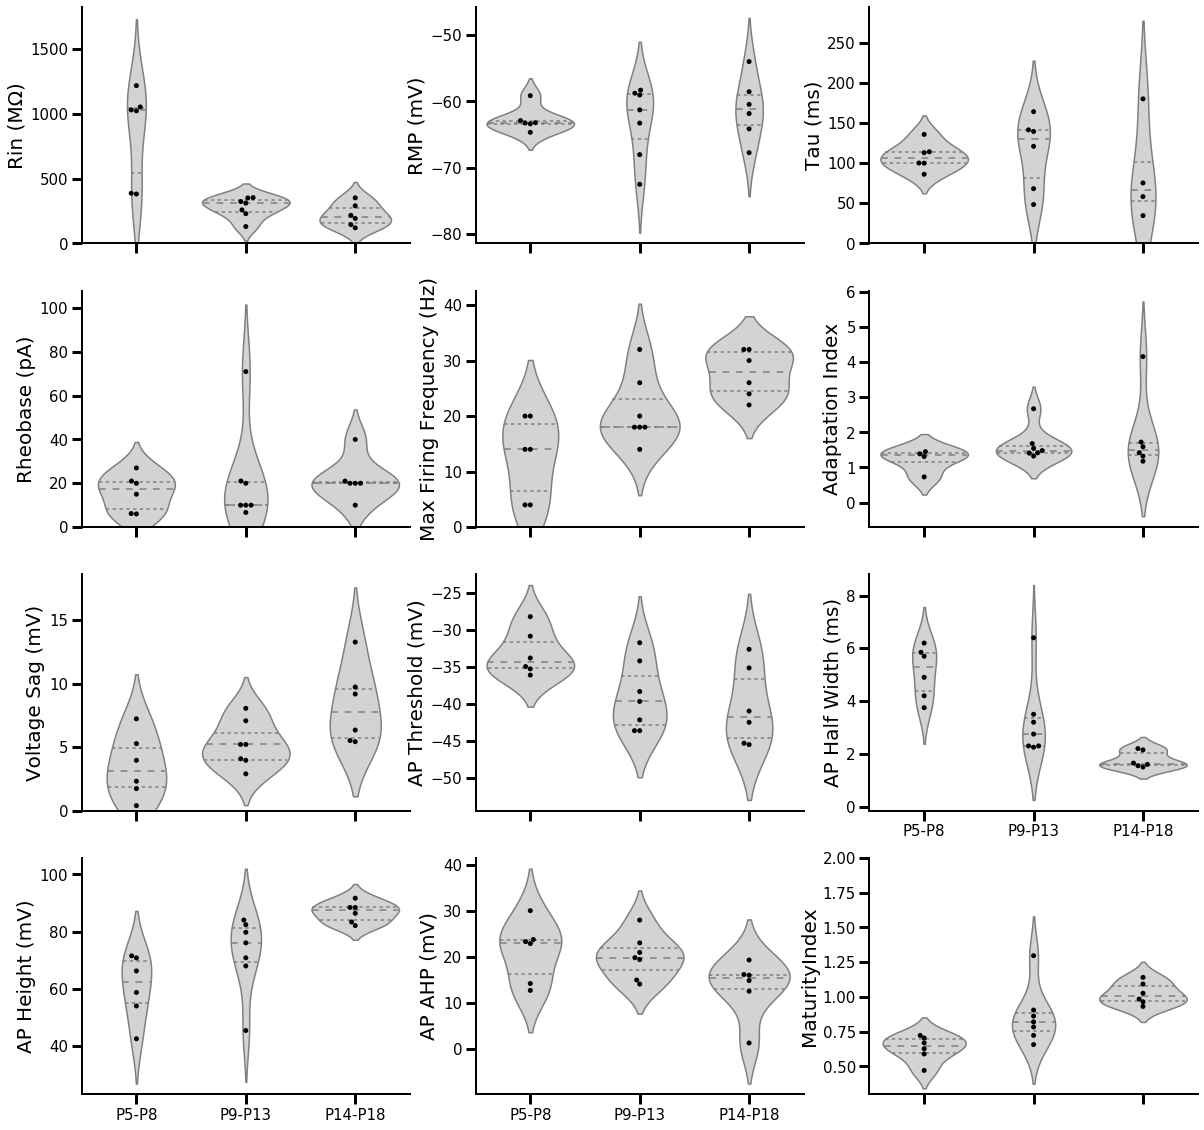

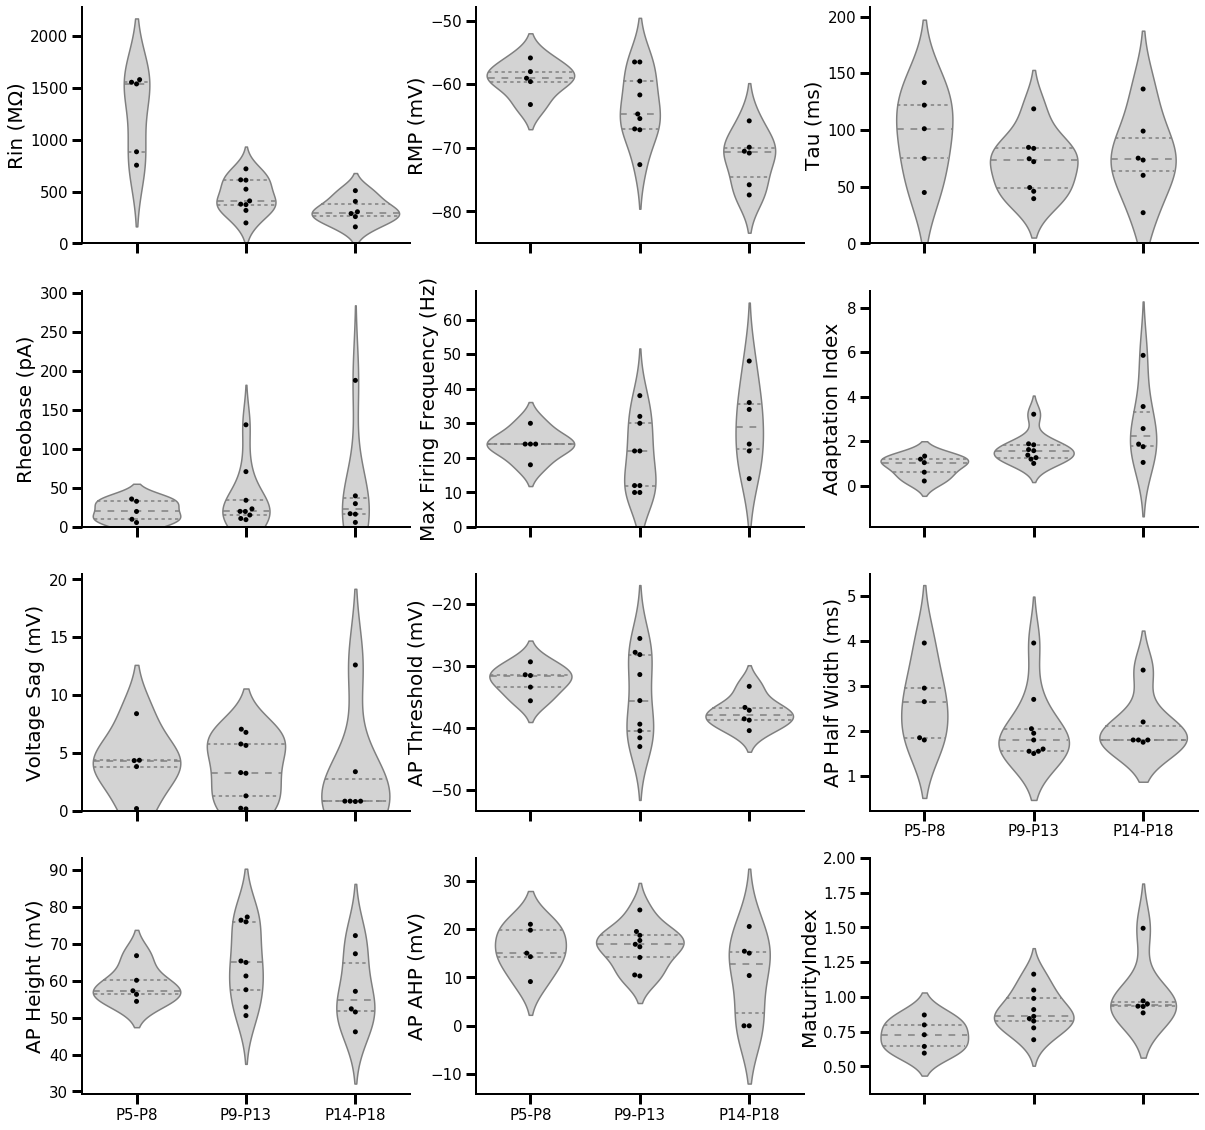

In [8]:
## Pyramidal cells across layers in V1
df = results[(results.BrainArea=="V1") & (results.CellType=="Pyr") & (results.CellLayer==23)]
df = getMaturityIndex(df)
plotIPfeatures_Window(df)
tmp=pd.concat([tmp,df])
plt.savefig('Figures//IP_V1_Pyr_L23.pdf')  


df = results[(results.BrainArea=="V1") & (results.CellType=="Pyr") & (results.CellLayer==5)]
df = getMaturityIndex(df)
plotIPfeatures_Window(df)
tmp=pd.concat([tmp,df])
plt.savefig('Figures//IP_V1_Pyr_L5.pdf') 

df = results[(results.BrainArea=="V1") & (results.CellType=="Pyr") & (results.CellLayer==6)]
df = getMaturityIndex(df)
plotIPfeatures_Window(df)
tmp=pd.concat([tmp,df])
plt.savefig('Figures//IP_V1_Pyr_L6.pdf') 

# tmp.to_csv('IntrinsicProfiles_Results_V1PyrOnly.csv')


C:\Users\Butt Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


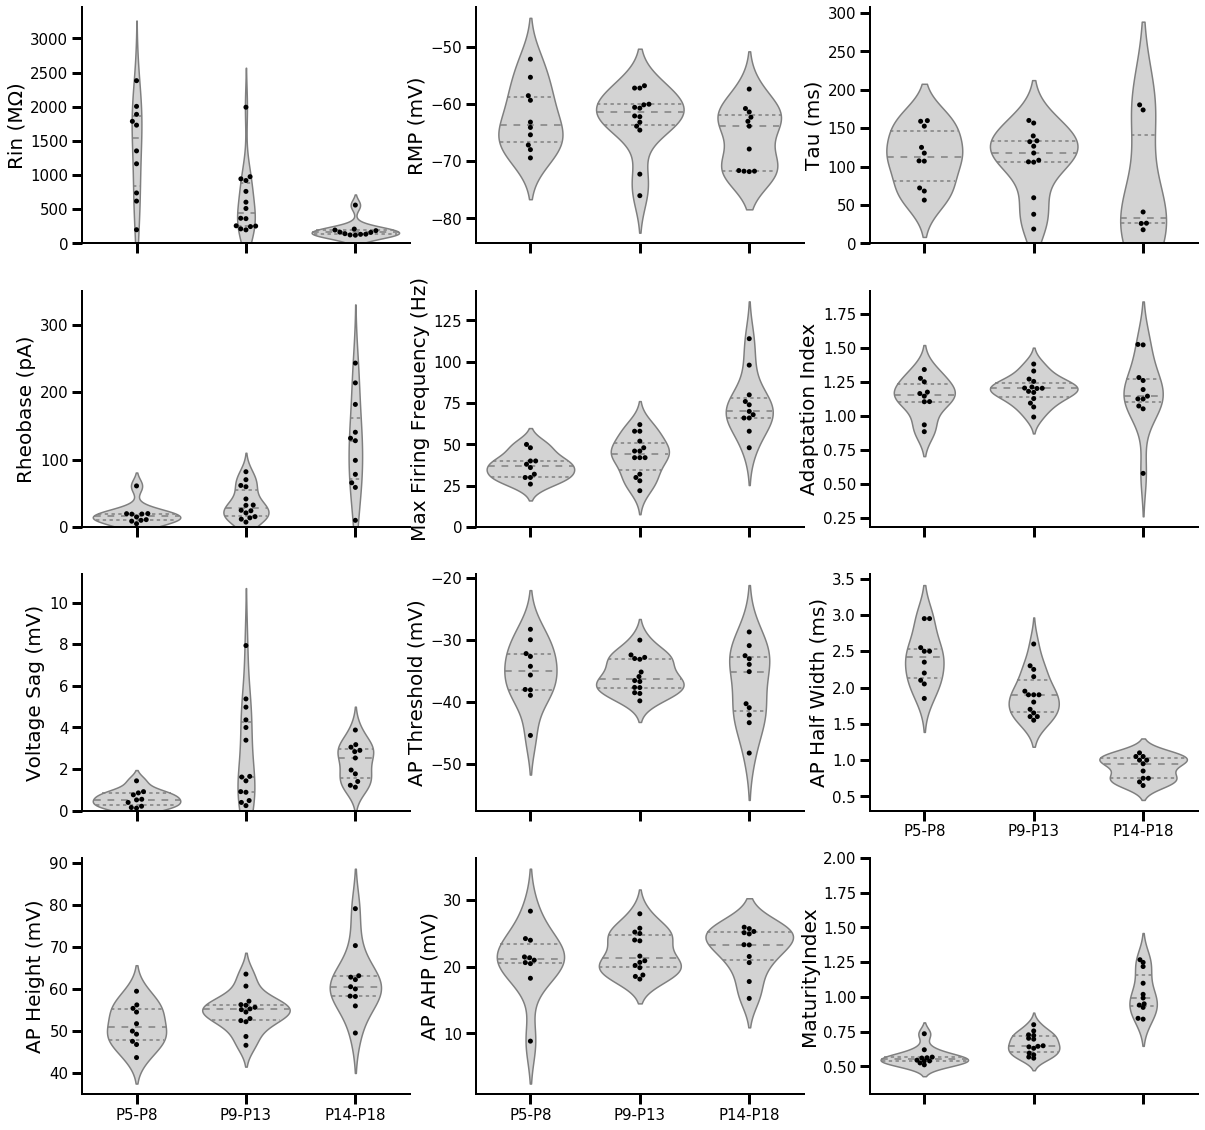

In [9]:
## L4 PV cells in V1
df = results[(results.BrainArea=="V1") & ((results.CellType=="FS") | (results.CellType=="PV")) & (results.CellLayer==4)]
df = getMaturityIndex(df)
plotIPfeatures_Window(df)
plt.savefig('Figures//IP_V1_FS_L4.pdf')  
tmp=pd.concat([tmp,df])

# df.to_csv('IntrinsicProfiles_Results_V1FSL4.csv')

C:\Users\Butt Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


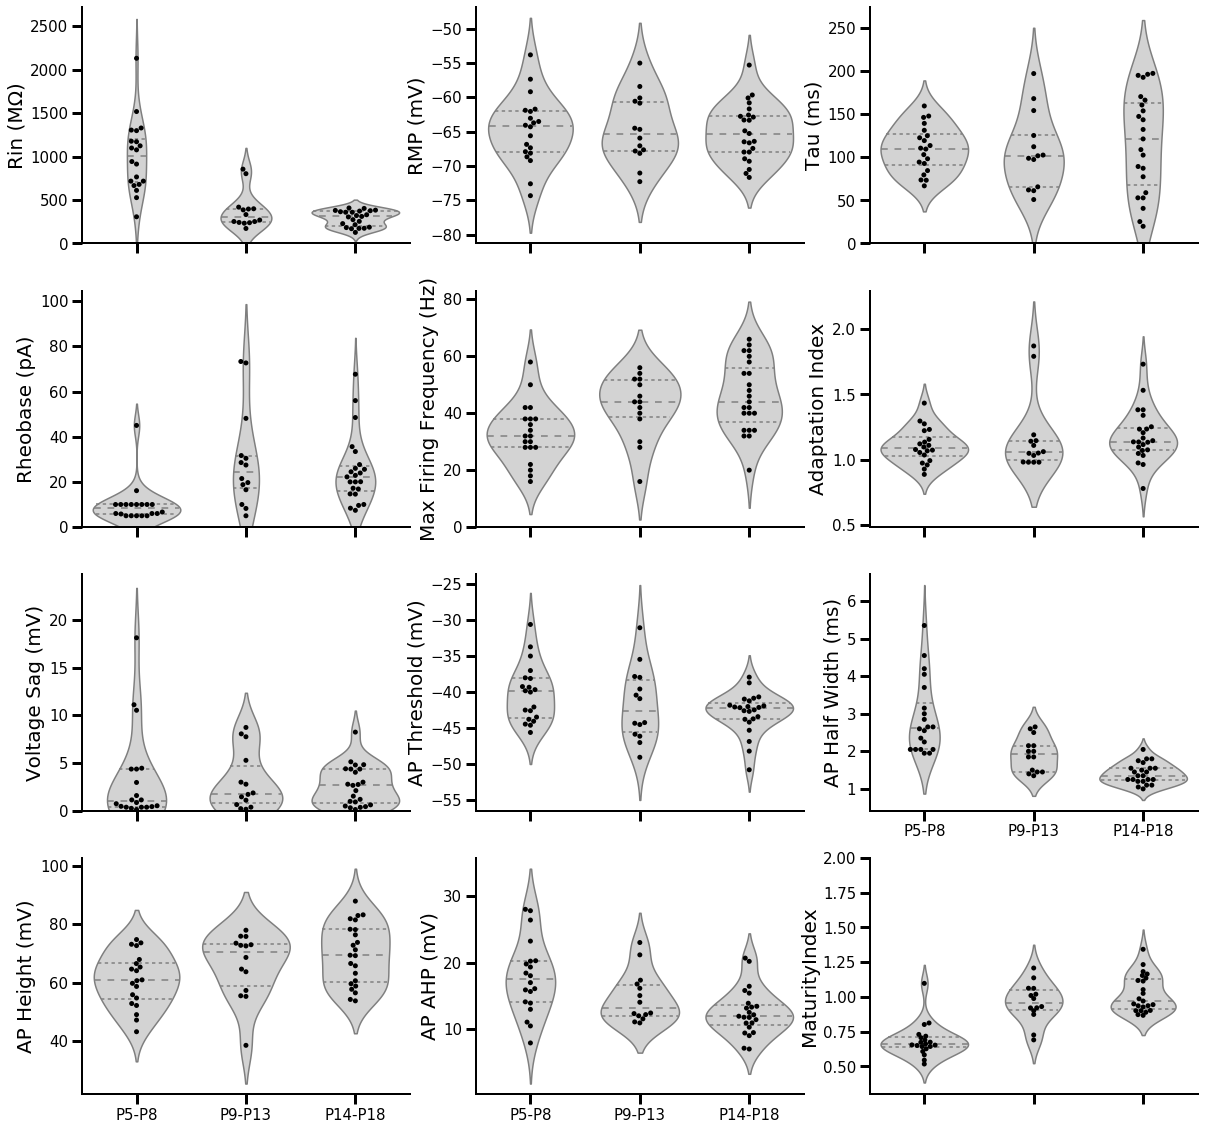

In [10]:
## L4/5/6 SST cells in V1
df = results[(results.BrainArea=="V1") & (results.CellType=="SST")]
df = getMaturityIndex(df)
plotIPfeatures_Window(df)
plt.savefig('Figures//IP_V1_SST_L4.pdf')  
# df.to_csv('IntrinsicProfiles_Results_V1SST.csv')
tmp=pd.concat([tmp,df])


C:\Users\Butt Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


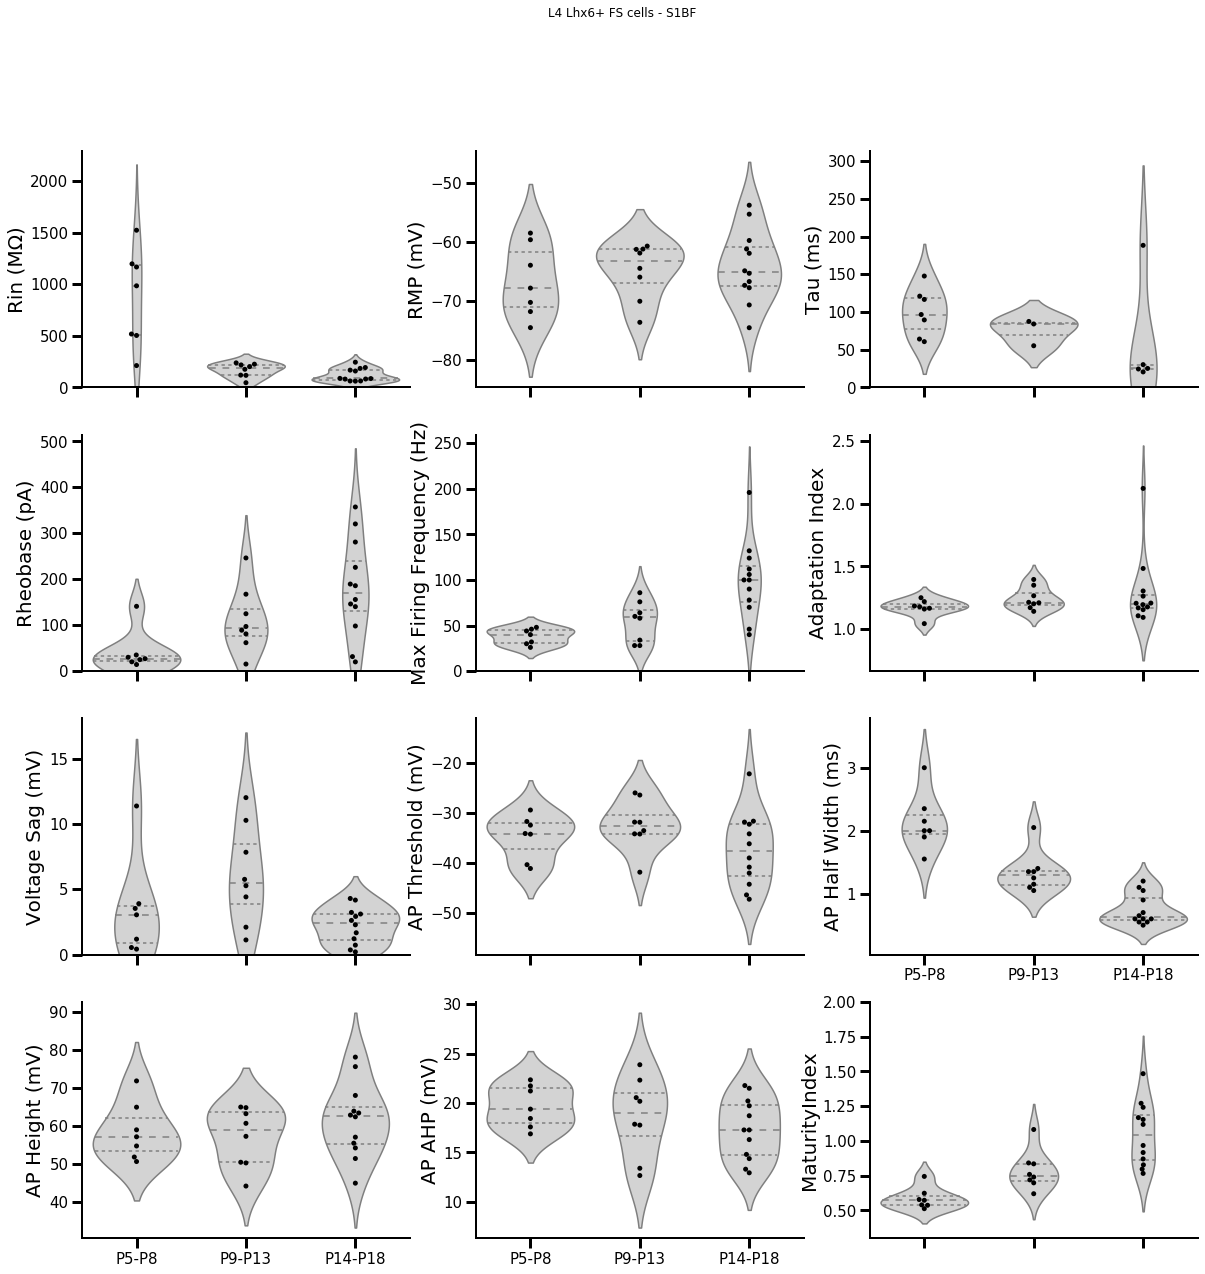

In [11]:
## L4 PV cells in S1BF
df = results[(results.BrainArea=="S1BF") & ((results.CellType=="FS") | (results.CellType=="PV"))]
df = getMaturityIndex(df)
plotIPfeatures_Window(df)
plt.suptitle('L4 Lhx6+ FS cells - S1BF')
plt.savefig('Figures//IP_S1_FS_L4.pdf')  
# tmp=df
tmp=pd.concat([tmp,df])


C:\Users\Butt Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


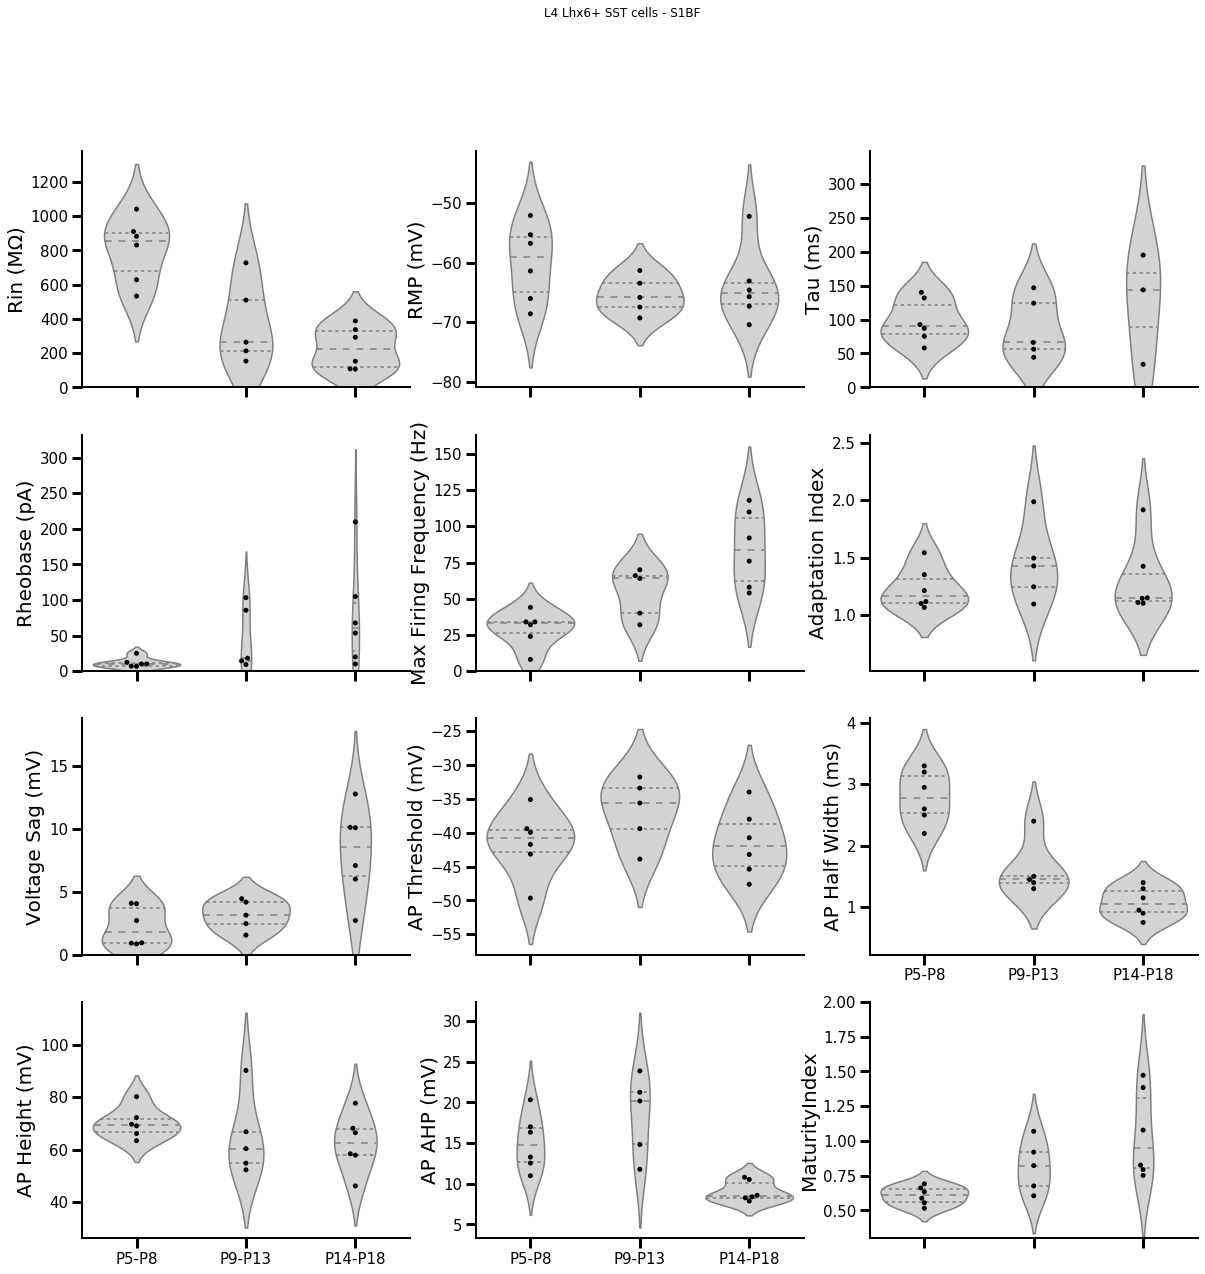

In [12]:
## L4 SST cells in S1BF
df = results[(results.BrainArea=="S1BF") & (results.CellType=="SST")  ]
df = getMaturityIndex(df)
plotIPfeatures_Window(df)
plt.suptitle('L4 Lhx6+ SST cells - S1BF')
plt.savefig('Figures//IP_S1_SST_L4.pdf')  
tmp=pd.concat([tmp,df])


C:\Users\Butt Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Butt Lab\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


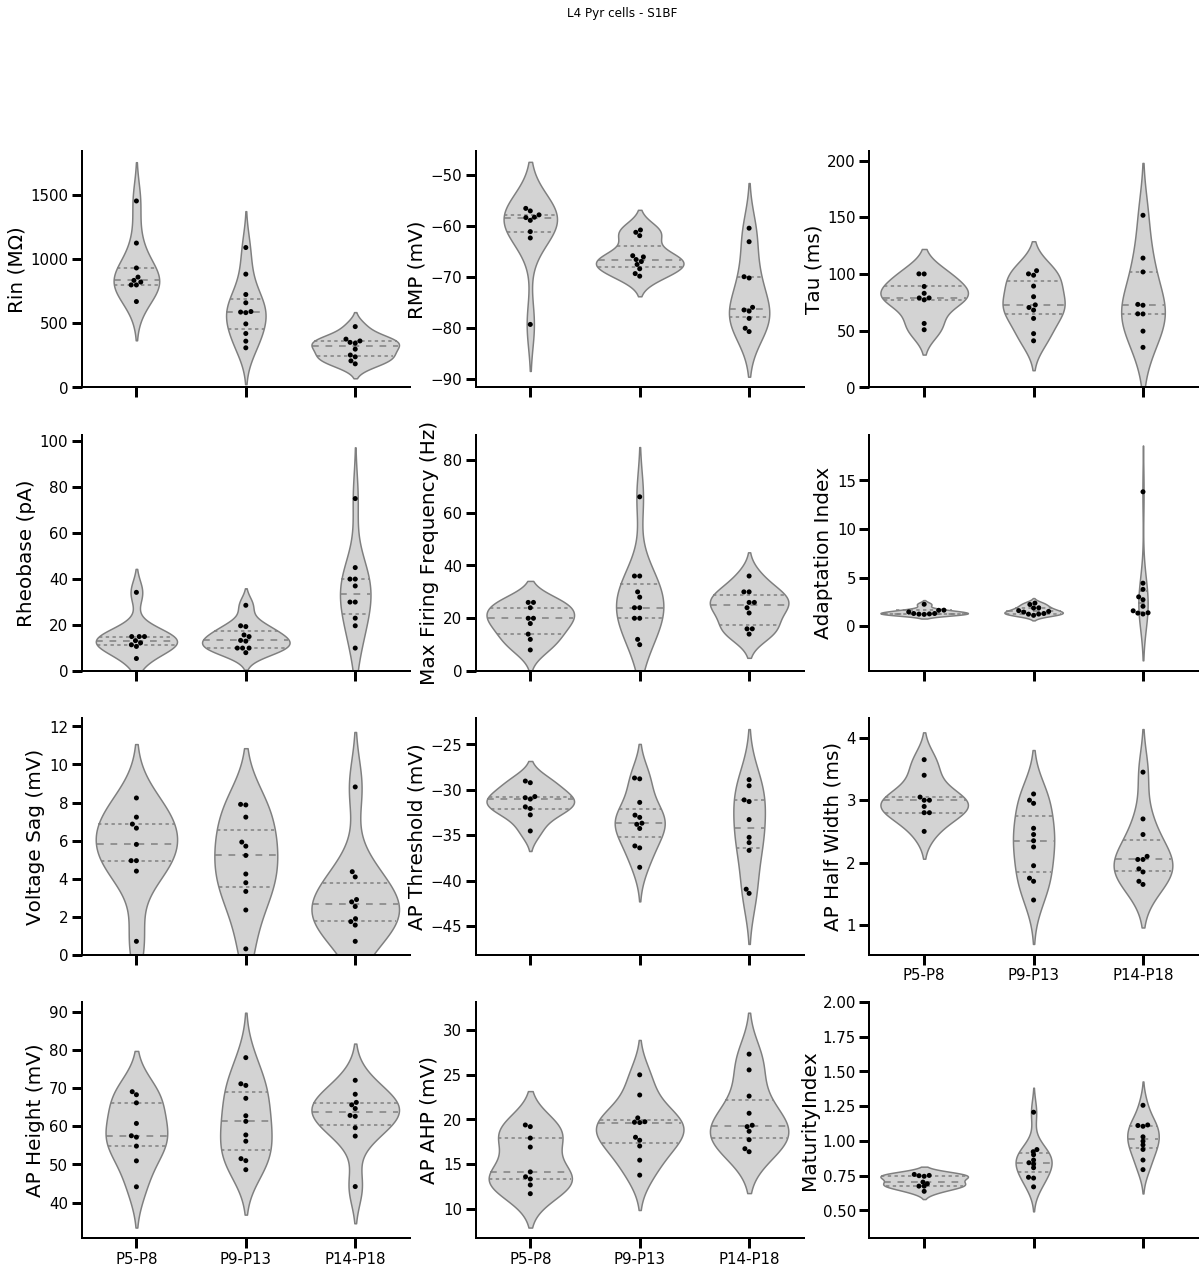

In [13]:
## L4 Pyr cells in S1BF
df = results[(results.BrainArea=="S1BF") & (results.CellType=="Pyr")  & (results.CellLayer==4)]
df = getMaturityIndex(df)
plotIPfeatures_Window(df)
plt.suptitle('L4 Pyr cells - S1BF')
plt.savefig('Figures//IP_S1_Pyr_L4.pdf')  
tmp=pd.concat([tmp,df])


In [14]:
tmp.to_csv('IntrinsicProfiles_Results_withMaturity.csv')

In [15]:
## Values for tables
pd.set_option("display.precision", 1)
columns = ["Rin", "RMP", "Tau", "Rheobase", "MaxFiringFrequency", "AdaptationIndex", "VoltageSag", "AP_Threshold", "AP_HalfWidth", "AP_Height", "AP_AHP"]
df.groupby('MouseDevelopment')[columns].std()

,Rin,RMP,Tau,Rheobase,MaxFiringFrequency,AdaptationIndex,VoltageSag,AP_Threshold,AP_HalfWidth,AP_Height,AP_AHP
MouseDevelopment,,,,,,,,,,,
P5-P8,234.3,7.1,17.0,7.9,6.3,0.3,2.2,1.7,0.3,8.3,2.9
P9-P13,228.9,3.2,21.0,6.0,15.2,0.4,2.4,3.0,0.6,9.5,3.2
P14-P18,89.4,7.0,35.8,17.7,7.1,3.8,2.3,4.4,0.5,7.6,3.7
